In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 237s 1us/step


In [15]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [16]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 66s 41ms/step - loss: 1.5344 - accuracy: 0.4391 - val_loss: 1.2374 - val_accuracy: 0.5515
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1841 - accuracy: 0.5770 - val_loss: 1.1641 - val_accuracy: 0.5868
Epoch 3/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.0301 - accuracy: 0.6378 - val_loss: 1.0055 - val_accuracy: 0.6475
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9294 - accuracy: 0.6753 - val_loss: 0.9326 - val_accuracy: 0.6795
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8624 - accuracy: 0.6966 - val_loss: 0.8990 - val_accuracy: 0.6877
Epoch 6/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.7970 - accuracy: 0.7195 - val_loss: 0.9532 - val_accuracy: 0.6726
Epoch 7/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.7497 - accuracy: 0.7352 - val_loss: 0.8768 -

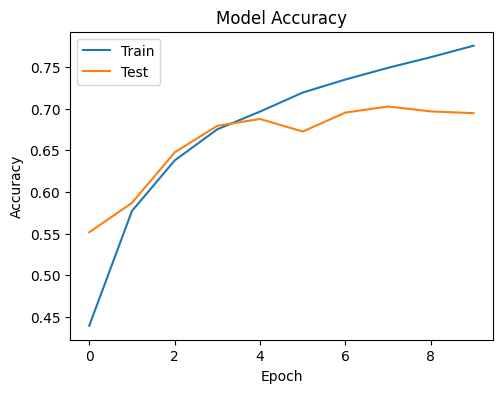

In [22]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

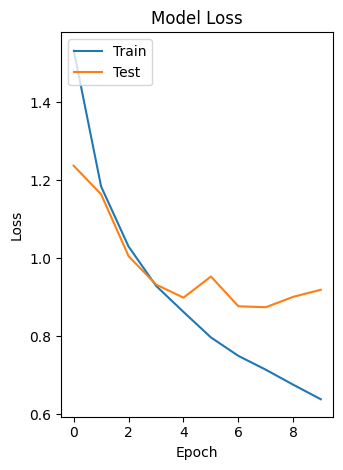

In [23]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


In [25]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy}")

313/313 - 4s - loss: 0.9192 - accuracy: 0.6947 - 4s/epoch - 12ms/step
Test accuracy: 0.6947000026702881


In [30]:
import numpy as np

# Assuming you have already loaded and preprocessed your test data
# test_images, test_labels = ...

# Make predictions
predictions = model.predict(test_images)

# Since the model outputs logits, you can use softmax to get class probabilities
predicted_probabilities = tf.nn.softmax(predictions, axis=-1)

# Get the predicted class for each image
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# You can now compare the predicted classes with the true labels
# to evaluate the model's performance or use it for other purposes.


313/313 [==============================] - 4s 12ms/step


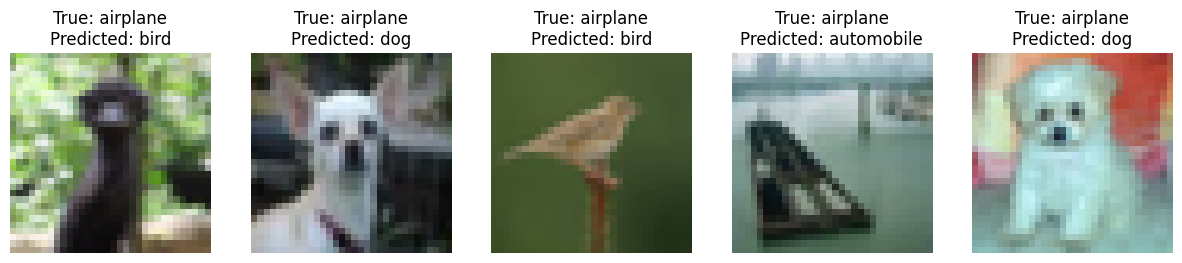

In [33]:
import matplotlib.pyplot as plt
import random

# Assuming you have already made predictions and have 'predicted_classes' and 'test_images' available

# Define class names (CIFAR-10 class names)
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Choose random images from the test set
num_images_to_visualize = 5
random_indices = random.sample(range(len(test_images)), num_images_to_visualize)

# Create subplots for visualization
plt.figure(figsize=(15, 5))
for i, image_index in enumerate(random_indices):
    plt.subplot(1, num_images_to_visualize, i + 1)
    plt.imshow(test_images[image_index])
    true_label = class_names[int(test_labels[image_index][0])]  # Convert to integer
    predicted_label = class_names[predicted_classes[image_index]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.show()
